# <font color='red'> Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear). 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy and justify your choice.
- Use GridSearchCv and corss-validation to find the best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through the mail.

# Grding rubric
|Description | Points|
|---|---|
|Data preprocessing | 5 points|
|Regression with cross-validation| 7 points|
|Classification with cross validation | 8 points|
|Total | 20 points|

# Data Source:


1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   

3. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 
   LINK for UCI Machine Learning Website for the data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
   
# Features:
   bank client data:
  1 - age (numeric)
  2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  4 - education (categorical: "secondary","primary","tertiary")
  5 - default: has credit in default? (binary: "yes","no")
  6 - balance: average yearly balance, in euros (numeric) 
  7 - housing: has housing loan? (binary: "yes","no")
  8 - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
  9 - contact: contact communication type (categorical:"telephone","cellular") 
 10 - day: last contact day of the month (numeric)
 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 12 - duration: last contact duration, in seconds (numeric)
   other attributes:
 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means   client was not previously contacted)
 15 - previous: number of contacts performed before this campaign and for this client (numeric)
 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# Output variable (desired target):
 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Importing Libraries and packages for classification

In [89]:
#import linear algebra and data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [36]:
def grid_search(name,model,grid_list,X_train,y_train,cvs=5):
    
    grid_search = GridSearchCV(model, param_grid = grid_list, n_jobs = -1, cv = cvs, scoring = 'neg_mean_squared_error',verbose=1) 
    grid_search.fit(X_train,y_train)
    print(name, "Best Score :",grid_search.best_score_)
    print(name, "Best Parameters :",grid_search.best_params_)

# Importing Data

In [37]:
bank_df = pd.read_csv("bank.csv")

In [38]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,unknown,no


In [39]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(bank_df)))

Bank marketing dataset consists of 4521 rows.


# Exploratory Data Analysis

In [40]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [41]:
#Renaming output column y to deposit
bank_df.rename(columns={'y':'deposit'}, inplace=True)

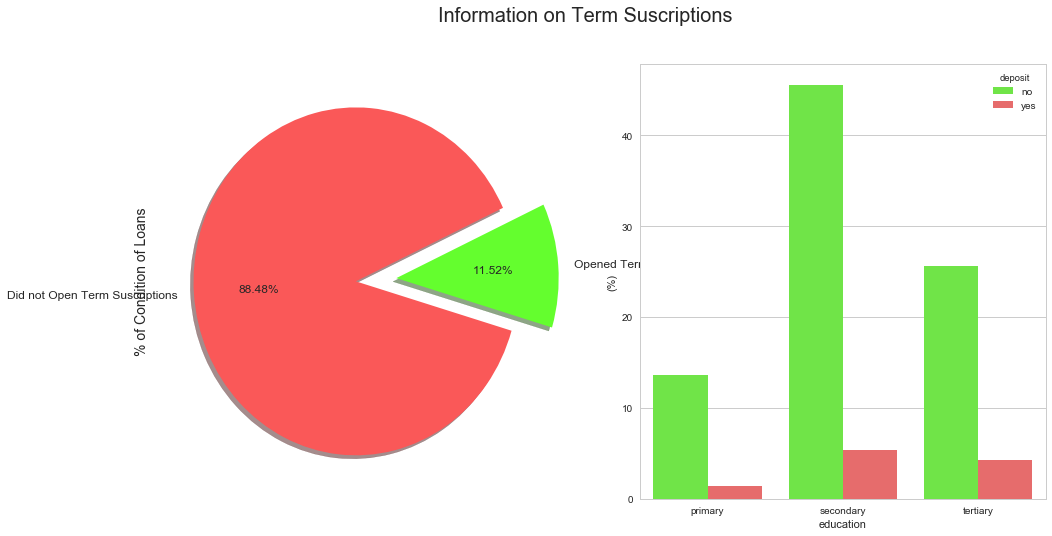

In [42]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

bank_df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=bank_df, palette=palette, estimator=lambda x: len(x) / len(bank_df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank_df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [43]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

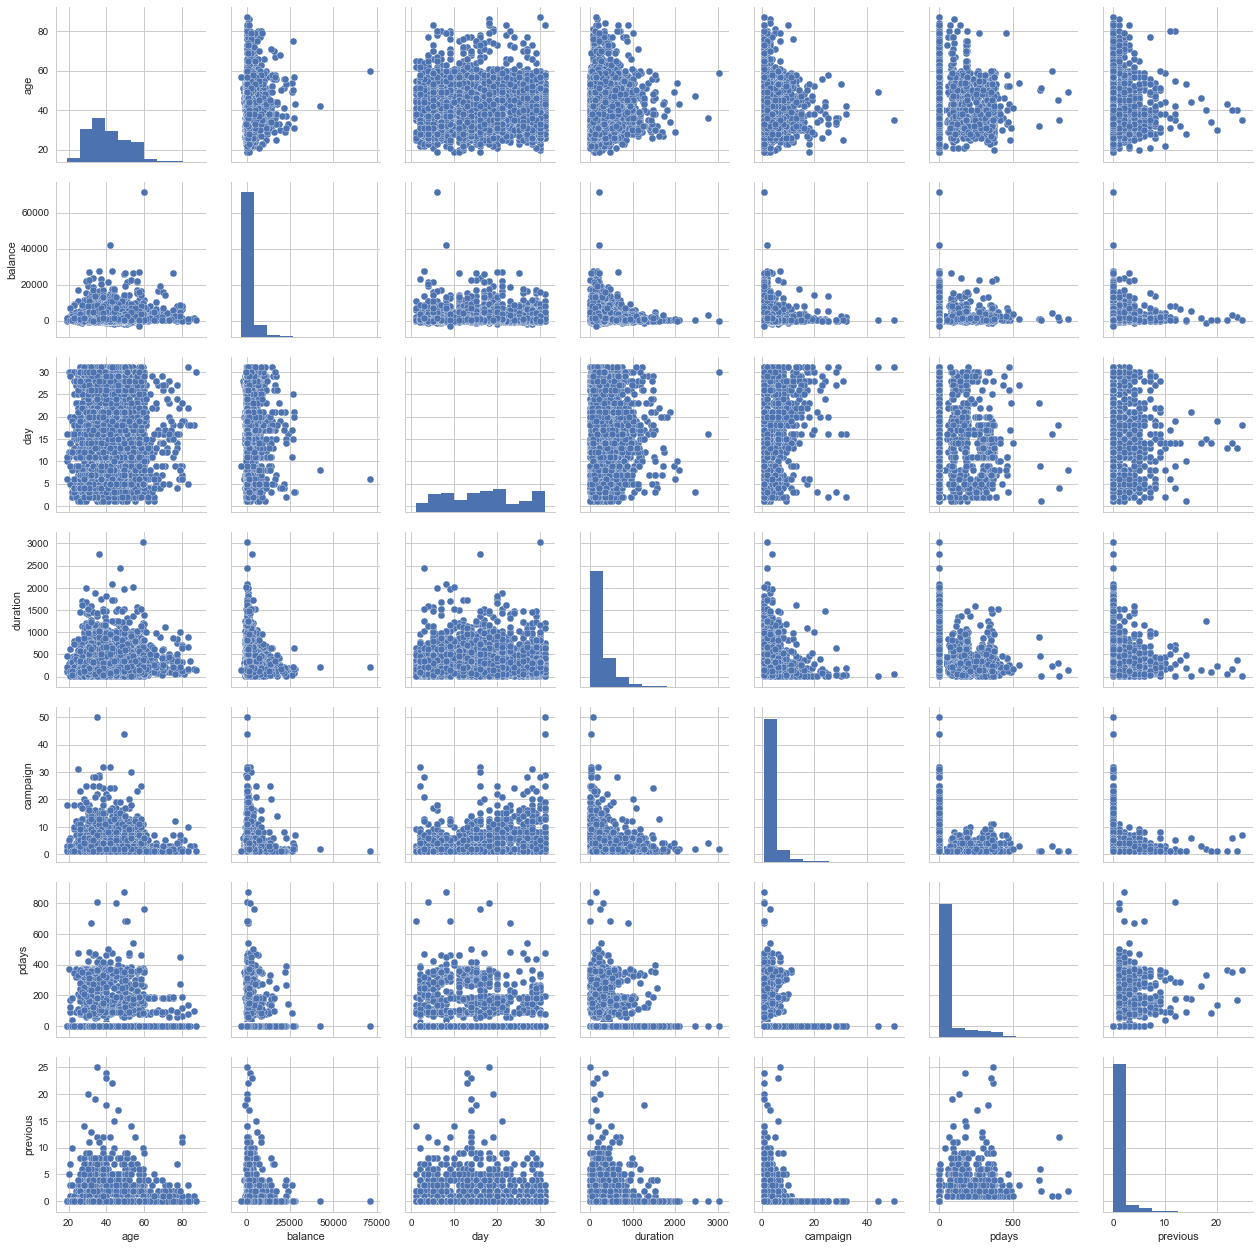

In [44]:
# plotting plot of the features 
sns.pairplot(bank_df) 

# Plotting the relation between features and target: deposit

# Data Preprocessing

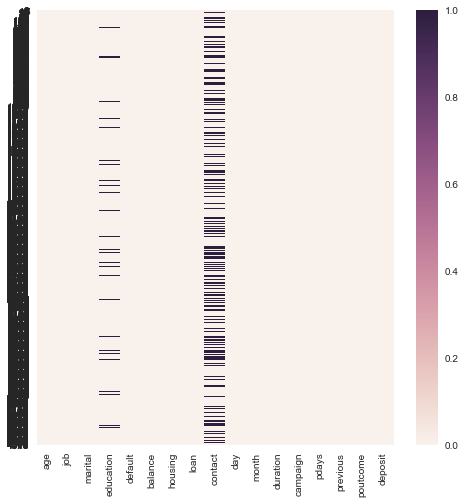

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(bank_df.isnull())

# These columns have null values: Education, contact

In [46]:
missing_values = bank_df.isnull().sum()

In [47]:
missing_values

age             0
job             0
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

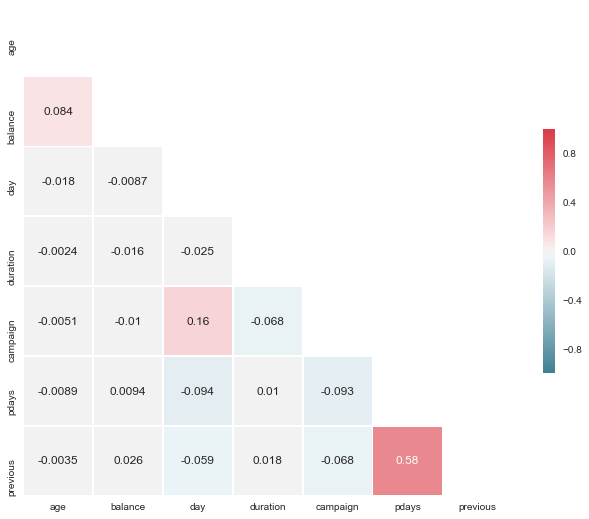

In [48]:
#Plotting correlation matrix 
sns.set(style="white")
mask = np.zeros_like(bank_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(bank_df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

# High correlation between previous and pdays, positive correlation between #balance and age, campaign and day

In [49]:
bank_df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
Name: education, dtype: int64

In [50]:
bank_df["contact"].fillna(value="cellular",inplace=True)
bank_df["education"].fillna(value="tertiary",inplace=True)
# Filling unknown or null values with the highest value in the contact and education columns


In [51]:
bank_df['deposit'].value_counts()

no     4000
yes     521
Name: deposit, dtype: int64

In [52]:
bank_df["contact"].isnull().sum()

0

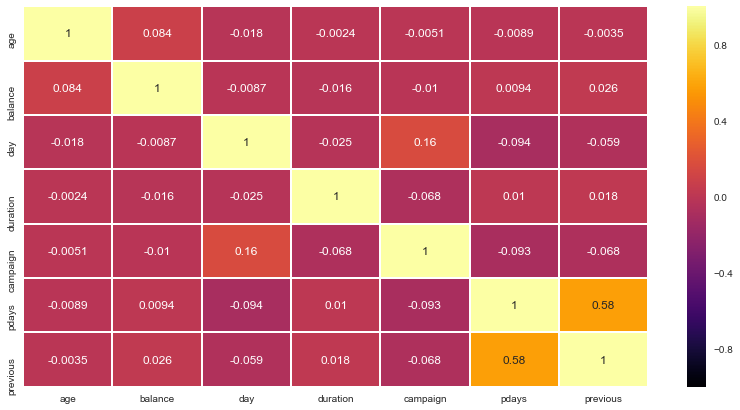

In [53]:
plt.figure(figsize=(14,7))
sns.heatmap(bank_df.corr(),annot=True,cmap='inferno',linewidths=1)

# Now converting Caterigorical columns
# By creating Dummy Variables and Mapping
# Before we will be able to apply machine learning techniques, we prepared the dataset for processing:

Convert columns with 'yes' and 'no' values to boolean columns;
Convert categorical columns into dummy variables.

In [54]:
#Creating dummies 
rcd=pd.get_dummies(bank_df['job'],columns='job',prefix='job')
bank_df=pd.concat([bank_df, rcd], axis=1)
bank_df.drop(['job'],axis=1,inplace= True)

In [55]:
outcome=pd.get_dummies(bank_df['poutcome'],columns='poutcome',prefix='poutcome')
bank_df=pd.concat([bank_df, outcome], axis=1)
bank_df.drop(['poutcome'],axis=1,inplace= True)

In [56]:
marriage=pd.get_dummies(bank_df['marital'],columns='marital',prefix='marital')
bank_df=pd.concat([bank_df, marriage], axis=1)
bank_df.drop(['marital'],axis=1,inplace= True)

In [57]:
communicate=pd.get_dummies(bank_df['contact'],columns='contact',prefix='contact')
bank_df=pd.concat([bank_df, communicate], axis=1)
bank_df.drop(['contact'],axis=1,inplace= True)

In [58]:
monthly=pd.get_dummies(bank_df['month'],columns='month',prefix='month')
bank_df=pd.concat([bank_df, monthly], axis=1)
bank_df.drop(['month'],axis=1,inplace= True)

In [59]:
educate=pd.get_dummies(bank_df['education'],columns='education',prefix='education')
bank_df=pd.concat([bank_df, educate], axis=1)
bank_df.drop(['education'],axis=1,inplace= True)

In [60]:
bank_df['default'] = bank_df['default'].map( 
    {'no': 0, 'yes': 1} ).astype(int)

In [61]:
bank_df['housing'] = bank_df['housing'].map( 
    {'no': 0, 'yes': 1} ).astype(int)

In [62]:
bank_df['loan'] = bank_df['loan'].map( 
    {'no': 0, 'yes': 1} ).astype(int)

In [63]:
bank_df['deposit'] = bank_df['deposit'].map( 
    {'no': 0, 'yes': 1} ).astype(int)

# Imbalanced Data

In [64]:
bank_df['deposit'].value_counts()

0    4000
1     521
Name: deposit, dtype: int64

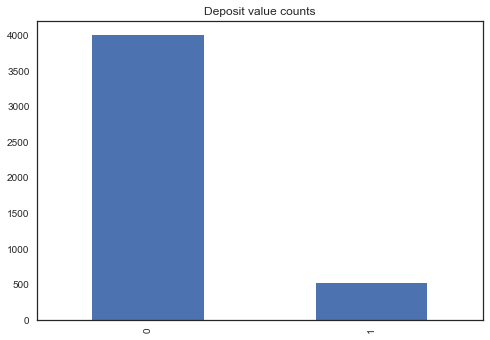

In [65]:
value_counts = bank_df['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

# Handling Unbalanced data using SMOTE function, by importing imblearn 
# Splitting the data into train and test.¶


In [66]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = bank_df.deposit
X = bank_df.drop('deposit', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [67]:
#Running logistic regression for checking the smote values
from sklearn.linear_model import LogisticRegression
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

In [68]:
f1_score(y_test, smote_pred)

0.522911051212938

In [69]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 47 columns):
age                    4521 non-null int64
default                4521 non-null int32
balance                4521 non-null int64
housing                4521 non-null int32
loan                   4521 non-null int32
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
deposit                4521 non-null int32
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-n

In [72]:
#Deleting pdays columns because of high correlation and not required for computation
bank_df = bank_df.drop(['pdays'],axis=1)

ValueError: labels ['pdays'] not contained in axis

In [73]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 46 columns):
age                    4521 non-null int64
default                4521 non-null int32
balance                4521 non-null int64
housing                4521 non-null int32
loan                   4521 non-null int32
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
previous               4521 non-null int64
deposit                4521 non-null int32
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-n

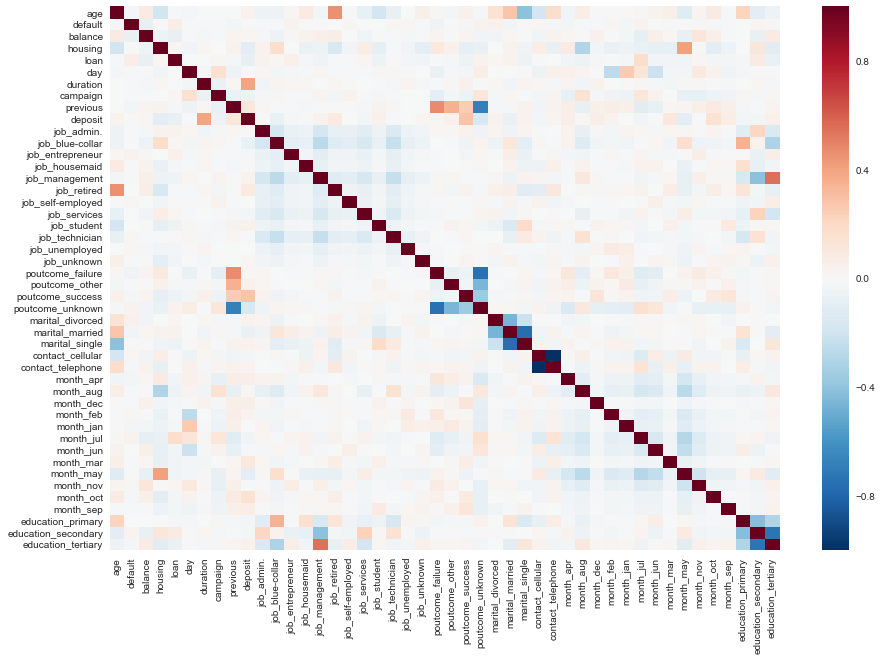

In [75]:
# Creating coorelation between for the created dummies 
%matplotlib inline

import seaborn as sns; sns.set()
plt.figure(figsize=(15,10))
corr = bank_df.corr()
sns.heatmap(corr)

In [76]:
bank_df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'education_primary',
       'education_secondary', 'education_tertiary'],
      dtype='object')

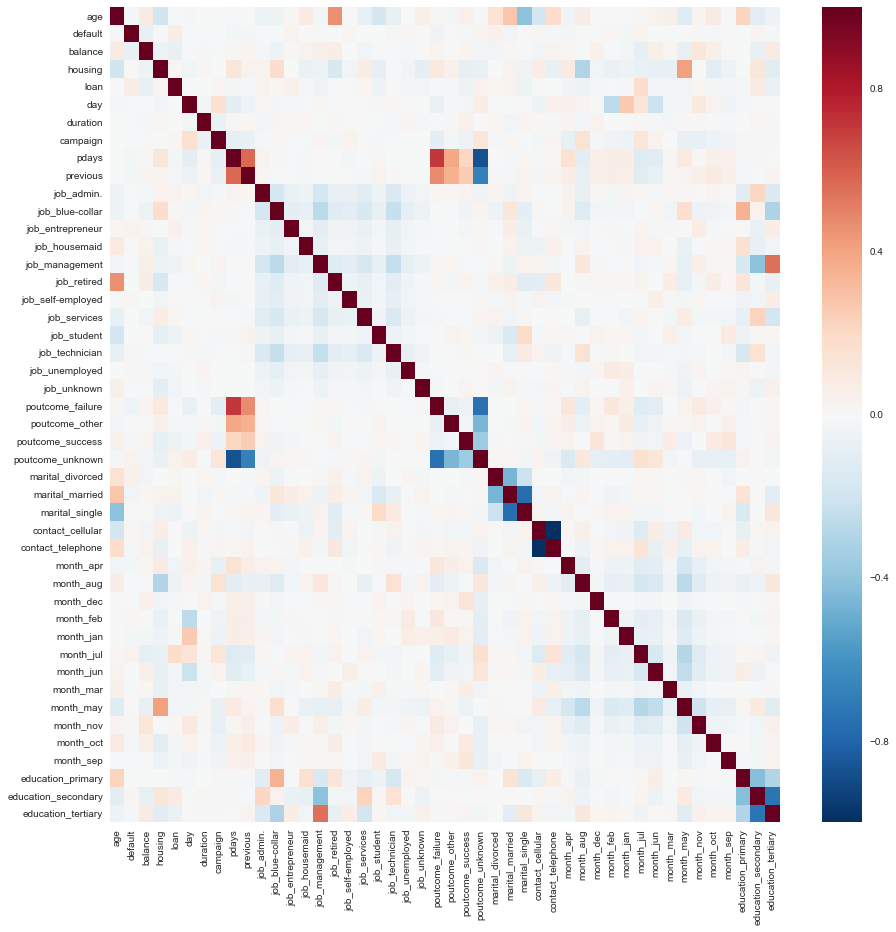

In [77]:
%matplotlib inline

import seaborn as sns; sns.set()
plt.figure(figsize=(15,15))
corr = X.corr()
sns.heatmap(corr)

In [78]:
columns = X.columns
corr_list = [] 

for i in range(0,len(columns)-1):
   corr_list.append(np.corrcoef(X.iloc[:,i] , y)[0,1])

print(corr_list)

[0.04509180287499885, 0.0013026526456215775, 0.017905098387636383, -0.10468340035106324, -0.07051703515462074, -0.011244207925172545, 0.4011183032752401, -0.061147431103831355, 0.10408681940919921, 0.11671443565541824, 0.006567509867461126, -0.06814702936273592, -0.015968160536269205, 0.004871635908918419, 0.032634288324659394, 0.08667484456726575, -0.0038274599919212184, -0.02407128733988264, 0.047809013618722904, -0.010153572999572806, -0.007311668205566398, 0.019886423066669504, 0.014556409646149475, 0.051908257586229634, 0.28348088327133103, -0.16203768441862118, 0.03484013908862752, -0.0646428694127261, 0.04581470443483423, -0.025877642661194144, 0.02587764266119408, 0.06256267135858348, 0.012083631765135836, 0.06988431486164517, 0.039804520482471954, -0.004108951180367264, -0.03885095717927025, -0.013323349457851663, 0.10271568419178079, -0.102077095991778, -0.01439715913884955, 0.14596375543619944, 0.07151025092308508, -0.02741960416529946, -0.02874415097625168]


In [79]:
#Scaling the dataset using StandardScalar

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trans_minmax = scaler.fit_transform(X)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linreg_MM = LinearRegression()

scores_MM = cross_val_score(linreg_MM, X_trans_minmax, y, cv=10)
print("Cross-validation scores: {}".format(scores_MM))
print("Average cross-validation score: {:.2f}".format(scores_MM.mean()))

Cross-validation scores: [0.22734531 0.24119671 0.21341757 0.28748689 0.27363816 0.29482743
 0.24540114 0.30684102 0.30894251 0.27900273]
Average cross-validation score: 0.27


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
X_trans_stanscal = sc.fit_transform(X)

In [83]:
scores_SS = cross_val_score(linreg_MM, X_trans_stanscal, y,cv=5)
print("Cross-validation scores: {}".format(scores_SS))
print("Average cross-validation score: {:.2f}".format(scores_SS.mean()))

Cross-validation scores: [0.23098526 0.24760304 0.28084184 0.27460505 0.29325142]
Average cross-validation score: 0.27


In [84]:
from sklearn.model_selection import train_test_split
# Separate input features and target
y = bank_df.deposit
X = bank_df.drop('deposit', axis=1)

In [85]:
print("No of features after preprocessing: ",X.shape[1])

No of features after preprocessing:  46


# Classification with Cross-Validation
# 1. Training a Logistic Regression Model
# Import LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression(random_state=1210)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1210, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

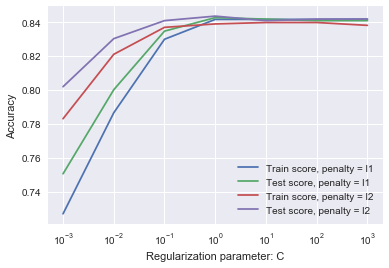

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

# Predictions and Evaluation of Logistic Regression¶
# Creating predictions from the test set and creating a classification report and confusion matrix.

In [56]:
predictions = lr.predict(X_test)

In [57]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.97      0.85      0.91      1008
          1       0.39      0.79      0.52       123

avg / total       0.91      0.84      0.86      1131


CONFUSION MATRIX:
[[857 151]
 [ 26  97]]

F-1 Score:  0.522911051212938


In [58]:
#Tuning Logistic Regression Model Parameters

In [59]:
lr = LogisticRegression(random_state=1210)

In [60]:
grid_list = {"C": np.arange(1, 15, 2),
             "max_iter": np.arange(25, 500, 50),
             "penalty": np.array(["l1","l2"]),
             "random_state": [1210] }
 
grid_search = GridSearchCV(lr, param_grid = grid_list, n_jobs = -1, cv = 5, scoring = 'f1',verbose=1) 

In [61]:
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   58.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1210, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 1,  3,  5,  7,  9, 11, 13]), 'max_iter': array([ 25,  75, 125, 175, 225, 275, 325, 375, 425, 475]), 'penalty': array(['l1', 'l2'], dtype='<U2'), 'random_state': [1210]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [62]:
print("Logistic Regression Best Score :",grid_search.best_score_)
print("Logistic Regression Best Parameters :",grid_search.best_params_)
best_scores = {}
best_scores["Logistic Regression"] = grid_search.best_score_

Logistic Regression Best Score : 0.8357884875609178
Logistic Regression Best Parameters : {'C': 5, 'max_iter': 25, 'penalty': 'l2', 'random_state': 1210}


In [63]:
lr = LogisticRegression(C= 5, max_iter=25,penalty='l2',random_state=1210)
lr.fit(X_train,y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=25, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1210, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predictions and Evaluation of Tuned Logistic Regression Model
# Creating predictions from the test set and creating a classification report and confusion matrix.

In [64]:
predictions = lr.predict(X_test)

In [65]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

f1_scores = {}
f1_scores["Logistic Regression"] = f1_score(y_test,predictions)

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.97      0.85      0.91      1008
          1       0.39      0.79      0.52       123

avg / total       0.91      0.84      0.86      1131


CONFUSION MATRIX:
[[856 152]
 [ 26  97]]

F-1 Score:  0.521505376344086


# 2. Training a Decision Tree Model
# Import DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
decision = DecisionTreeClassifier(random_state=1210)
decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1210,
            splitter='best')

# Predictions and Evaluation of Decision Tree¶
# Creating predictions from the test set and creating a classification report and confusion matrix

In [54]:
predictions = decision.predict(X_test)

In [69]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.94      0.93      0.93      1008
          1       0.46      0.51      0.49       123

avg / total       0.89      0.88      0.88      1131


CONFUSION MATRIX:
[[935  73]
 [ 60  63]]

F-1 Score:  0.48648648648648646


# Tuning Decision Tree Parameters

In [55]:
dt = DecisionTreeClassifier()

In [71]:
grid_list = {"max_depth" : np.array([10,20,40,80,100,120]),
             "min_samples_leaf" : np.array([0.1,0.2,0.3,0.4,0.5]), 
             "min_samples_split" : np.array([0.1,0.2,0.4,0.6,0.8,0.9]),
             "max_features": np.array([12,14,16,18]),
             "random_state" : [1210]}
 
grid_search = GridSearchCV(dt, param_grid = grid_list, n_jobs = -1, cv = 5, scoring = 'f1',verbose=1) 

In [72]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 970 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 2470 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   33.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 10,  20,  40,  80, 100, 120]), 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'min_samples_split': array([0.1, 0.2, 0.4, 0.6, 0.8, 0.9]), 'max_features': array([12, 14, 16, 18]), 'random_state': [1210]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [73]:
print("Decision Tree Best Score :",grid_search.best_score_)
print("Decision Tree Best Parameters :",grid_search.best_params_)

best_scores["Decision Tree"] = grid_search.best_score_

Decision Tree Best Score : 0.7829925524565546
Decision Tree Best Parameters : {'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'random_state': 1210}


In [74]:
dt = DecisionTreeClassifier(max_depth=10, max_features=12, min_samples_leaf=0.1,min_samples_split=0.1,random_state=1210)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1210,
            splitter='best')

# Predictions and Evaluation of Tuned Decision Tree Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix

In [75]:
predictions = dt.predict(X_test)

In [76]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

f1_scores["Decision Tree"] = f1_score(y_test,predictions)

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.96      0.81      0.87      1008
          1       0.30      0.69      0.42       123

avg / total       0.88      0.79      0.83      1131


CONFUSION MATRIX:
[[813 195]
 [ 38  85]]

F-1 Score:  0.4218362282878412


# Training the Random Forest model¶
# Import RandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(random_state=1210)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1210, verbose=0,
            warm_start=False)

# Predictions and Evaluation of Random Forest

In [79]:
predictions = rfc.predict(X_test)

In [80]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1008
          1       0.54      0.30      0.39       123

avg / total       0.88      0.90      0.88      1131


CONFUSION MATRIX:
[[976  32]
 [ 86  37]]

F-1 Score:  0.3854166666666667


# Tuning Random Forest Parameters

In [81]:
rfc = RandomForestClassifier(random_state=1210)

In [82]:
grid_list = {'n_estimators': [50,100,150,200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,30,60,80],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               "random_state": [1210]}
     
grid_search = GridSearchCV(rfc, param_grid = grid_list, n_jobs = -1, cv = 3, scoring = 'f1',verbose=1)

In [83]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 17.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1210, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 60, 80], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'random_state': [1210]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [84]:
print("Random Forest Best Score :",grid_search.best_score_)
print("Random Forest Best Parameters :",grid_search.best_params_)

best_scores["Random Forest"] = grid_search.best_score_

Random Forest Best Score : 0.9186506333597951
Random Forest Best Parameters : {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 1210}


In [85]:
rfc = RandomForestClassifier(bootstrap=False,
                             max_depth=30,
                             max_features='auto',
                             min_samples_leaf=2,
                             min_samples_split=5,
                             n_estimators=50,
                             random_state=1210)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1210, verbose=0,
            warm_start=False)

# Predictions and Evaluation of Tuned Random Forest Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix

In [86]:
predictions = rfc.predict(X_test)

In [87]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

f1_scores["Random Forest"] = f1_score(y_test,predictions)

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      1008
          1       0.61      0.29      0.40       123

avg / total       0.89      0.90      0.89      1131


CONFUSION MATRIX:
[[985  23]
 [ 87  36]]

F-1 Score:  0.3956043956043956


# Training a K-Nearest Neighbors Model¶
# Import KNeighborsClassifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

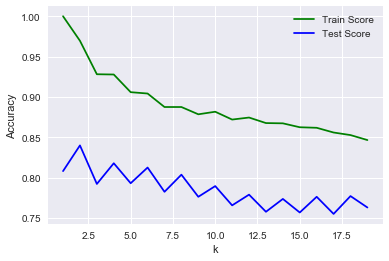

In [84]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [90]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Predictions and Evaluation of K-Nearest Neighbors Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix

In [91]:
predictions = knn.predict(X_test)

In [92]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.95      0.81      0.87      1008
          1       0.29      0.64      0.40       123

avg / total       0.88      0.79      0.82      1131


CONFUSION MATRIX:
[[818 190]
 [ 44  79]]

F-1 Score:  0.403061224489796


# Tuning Random Forest Parameters

In [93]:
knn = KNeighborsClassifier()

In [94]:
grid_list = {'n_neighbors':[3,5,7,9],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
     
grid_search = GridSearchCV(knn, param_grid = grid_list, n_jobs = -1, cv = 3, scoring = 'f1',verbose=1)

In [95]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 7, 9], 'leaf_size': [1, 2, 3, 5], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [96]:
print("KNN Best Score :",grid_search.best_score_)
print("KNN Best Parameters :",grid_search.best_params_)

best_scores["KNN"] = grid_search.best_score_

KNN Best Score : 0.8790298539224527
KNN Best Parameters : {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}


In [97]:
knn = KNeighborsClassifier(algorithm='auto',
                           leaf_size=1,
                           n_neighbors=3,
                           weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

# Predictions and Evaluation of Tuned Random Forest Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix

In [98]:
predictions = knn.predict(X_test)

In [99]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

f1_scores["KNN"] = f1_score(y_test,predictions)

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.94      0.82      0.88      1008
          1       0.28      0.55      0.37       123

avg / total       0.87      0.79      0.82      1131


CONFUSION MATRIX:
[[829 179]
 [ 55  68]]

F-1 Score:  0.3675675675675676


# Training a Linear SVC Model¶
# Import LinearSVC

In [100]:
from sklearn.svm import LinearSVC

In [101]:
lsvc =LinearSVC(random_state=1210)
lsvc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1210, tol=0.0001,
     verbose=0)

# Predictions and Evaluation of Linear SVC Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix

In [102]:
predictions = lsvc.predict(X_test)

In [103]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.96      0.82      0.89      1008
          1       0.34      0.75      0.47       123

avg / total       0.90      0.81      0.84      1131


CONFUSION MATRIX:
[[828 180]
 [ 31  92]]

F-1 Score:  0.46582278481012657


# Tuning Linear SVC Parameters

In [104]:
lsvc = LinearSVC(random_state=1210)

In [105]:
grid_list = {'C': [6,7,8,9,10,11,12],
            'max_iter' : [1000,2000,3000],
            "random_state": [1210]}
    

grid_search = GridSearchCV(lsvc, param_grid = grid_list, n_jobs = -1, cv = 5, scoring = 'f1',verbose=1) 

In [106]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1210, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [6, 7, 8, 9, 10, 11, 12], 'max_iter': [1000, 2000, 3000], 'random_state': [1210]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [107]:
print("Linear SVC Score :",grid_search.best_score_)
print("Linear SVC Best Parameters :",grid_search.best_params_)

best_scores["Linear SVC"] = grid_search.best_score_

Linear SVC Score : 0.7386694319427887
Linear SVC Best Parameters : {'C': 11, 'max_iter': 3000, 'random_state': 1210}


In [111]:
lsvc = LinearSVC(C=11, max_iter=3000, random_state=1210)
lsvc.fit(X_train,y_train)

LinearSVC(C=11, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3000,
     multi_class='ovr', penalty='l2', random_state=1210, tol=0.0001,
     verbose=0)

# Predictions and Evaluation of Tuned Linear SVC Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix.

In [112]:
predictions = lsvc.predict(X_test)

In [113]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

f1_scores["Linear SVC"] = f1_score(y_test,predictions)

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1008
          1       0.11      0.02      0.04       123

avg / total       0.81      0.87      0.83      1131


CONFUSION MATRIX:
[[984  24]
 [120   3]]

F-1 Score:  0.04


# Training a Kernalized SVC Model¶
# Import SVC

In [119]:
from sklearn.svm import SVC

In [120]:
ksvc = SVC(kernel='rbf',random_state=1210)
ksvc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1210, shrinking=True,
  tol=0.001, verbose=False)

# Predictions and Evaluation of Linear SVC Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix.

In [121]:
predictions = ksvc.predict(X_test)

In [122]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.89      0.99      0.94      1008
          1       0.00      0.00      0.00       123

avg / total       0.79      0.88      0.84      1131


CONFUSION MATRIX:
[[999   9]
 [123   0]]

F-1 Score:  0.0


# Tuning Kernal SVC Parameters

In [123]:
ksvc = SVC(kernel='rbf',random_state=1210)

In [124]:
grid_list = {'C': [1,2,3,4,5,6,7],
             'gamma': [0.5,1,2,3,5],
             "random_state": [1210]}
    
    
grid_search = GridSearchCV(ksvc, param_grid = grid_list, n_jobs = -1, cv = 5, scoring = 'f1',verbose=1)

In [125]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 11.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1210, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7], 'gamma': [0.5, 1, 2, 3, 5], 'random_state': [1210]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [126]:
print("Kernal SVC Score :",grid_search.best_score_)
print("Kernal SVC Best Parameters :",grid_search.best_params_)

best_scores["Kernal SVC"] = grid_search.best_score_

Kernal SVC Score : 0.2705870713676023
Kernal SVC Best Parameters : {'C': 2, 'gamma': 0.5, 'random_state': 1210}


In [134]:
ksvc = SVC(kernel='rbf',C=2,gamma=0.5,random_state=1210)
ksvc.fit(X_train,y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=1210, shrinking=True,
  tol=0.001, verbose=False)

# Predictions and Evaluation of Tuned Linear SVC Model¶
# Creating predictions from the test set and creating a classification report and confusion matrix

In [135]:
predictions = ksvc.predict(X_test)

In [136]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test,predictions))

print("\nF-1 Score: ",f1_score(y_test,predictions))

f1_scores["Kernal SVC"] = f1_score(y_test,predictions)

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.89      1.00      0.94      1008
          1       0.00      0.00      0.00       123

avg / total       0.79      0.89      0.84      1131


CONFUSION MATRIX:
[[1008    0]
 [ 123    0]]

F-1 Score:  0.0


# SVC with kernel

In [90]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['poly', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']}


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

In [153]:
 print(sorted(best_scores.items(), key = 
             lambda kv:(kv[1], kv[0])))

[('Kernal SVC', 0.2705870713676023), ('Linear SVC', 0.7386694319427887), ('Decision Tree', 0.7829925524565546), ('Logistic Regression', 0.8357884875609178), ('KNN', 0.8790298539224527), ('Random Forest', 0.9186506333597951)]


In [154]:
 print(sorted(f1_scores.items(), key = 
             lambda kv:(kv[1], kv[0])))

[('Kernal SVC', 0.0), ('Linear SVC', 0.04), ('KNN', 0.3675675675675676), ('Random Forest', 0.3956043956043956), ('Decision Tree', 0.4218362282878412), ('Logistic Regression', 0.521505376344086)]


# Logistic Regression is clearly the best model 
- Best F1 Score
- Comparable Best Cross Validation Score
- Interpretation is lucid and easy

##  We used F1 score for evaluating best model because -: we don’t want defaulters should be given a term deposit so -> we want less false negatives 
And for any company to predict if the client will subscribe a term deposit, so in that case we want the false positives to be also less.
Both recall and precision are important and should be high. Both type1 error and type11 error should be least so we are taking F1 score as decision maker as its is a harmonic mean of both and considers both the score function. F1 Score is better measure as it seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).
# Describing the Data-set 
Total rows - 4521
Total columns – 17 (No of features increased to 46 by creating dummy variables for features)


Missing Data- As out dataset is not having any missing values so we removed   unknown values from contact and education columns for dealing with the missing values-

Reason for using Standard Scaler  – because most of the data is normally distributed and the Standard scale will scale all features such that the distribution is centered around 0, with a standard deviation of 1.